Teilprüfung 2 - Willi Brügel

Aufgabe
Entwickle ein Python-Skript, das einen Datensatz mit drei Klassen und jeweils zwei Merkmalen pro Klasse verwendet. Der Datensatz soll zufällig generiert werden und aus 150 Datenpunkten bestehen. Verwende für die Merkmale eine Normalverteilung mit unterschiedlichen Mittelwerten und Standardabweichungen für jede Klasse, um eine gewisse Überlappung zwischen den Klassen zu gewährleisten. 











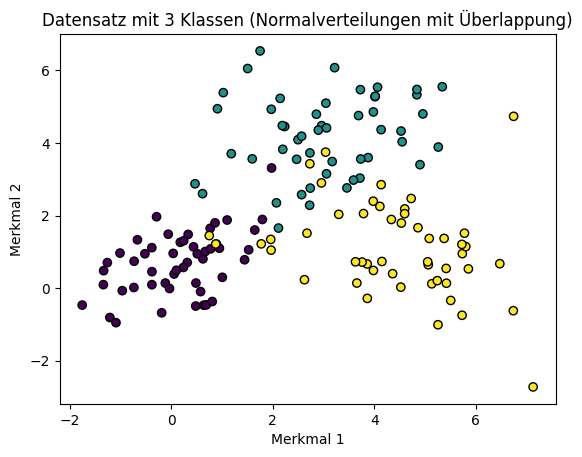

In [65]:
# Datensatz mit numpy generieren: 

import numpy as np
import matplotlib.pyplot as plt

# Parameter festlegen:
n_classes = 3
samples_per_class = 50
# für reproduzierbare Ergebnisse: 
np.random.seed(42)

# Mittelwerte und Kovarianzmatrizen: 

means = [
    [0.0, 0.6],     # Klasse 0
    [3, 4],     # Klasse 1
    [4.5, 1]      # Klasse 2
]

# Liste der Kovarianzmatrizen pro Klasse
# Jede Matrix bestimmt die Streuung und ggf. Richtung der Ausdehnung
covariances = [
    [[1, 0.6], [0.6, 1]],   # Klasse 0
    [[1.8, 0.5], [0.5, 1.4]],   # Klasse 1
    [[1.6, -0.3], [-0.3, 1.5]]  # Klasse 2
]

# Datensatz erzeugen: 
X_list = []
y_list = []

# für jede Klasse Punkte generieren und Labels zuweisen: 
for i in range(n_classes):
    # Punkte zufällig aus multivariater Normalverteilung ziehen
    X_i = np.random.multivariate_normal(mean=means[i],
                                        cov=covariances[i],
                                        size=samples_per_class)
    
    # Labels als Zahlen (0, 1, 2) für jede Klasse
    y_i = np.full(samples_per_class, i)

    # Ergebnisse in Listen sammeln
    X_list.append(X_i)
    y_list.append(y_i)

# Alle Klassen zu einem Datensatz zusammenfügen
X = np.vstack(X_list)     # Form: (150, 2)
y = np.hstack(y_list)     # Form: (150,)

# Darstellung im Plot:


# Punkte mit Farbe nach Klasse darstellen
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Merkmal 1")
plt.ylabel("Merkmal 2")
plt.title("Datensatz mit 3 Klassen (Normalverteilungen mit Überlappung)")
plt.show()

a) Teile den Datensatz in 70% Trainingsdaten und 30% Testdaten auf. 

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=0)

b) Verwende einen Decision Tree Classifier, um ein Modell mit den Trainingsdaten zu trainieren. Setze die maximale Tiefe des Baumes auf 3, um eine Überanpassung zu vermeiden. 

In [67]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree implementieren
tree = DecisionTreeClassifier(criterion="gini",
                              max_depth=3,
                              random_state=1)
tree.fit(X_train, y_train)

# Decision Tree auf Testdaten anwenden
y_predict_tree = tree.predict(X_test)

c) Verwende einen K-Nearest Neighbors (KNN) Classifier, um ein weiteres Modell mit den Trainingsdaten zu trainieren. Wähle K=5 für die Anzahl der nächsten Nachbarn. 

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Daten für KNN skalieren: 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# KNN implementieren: 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

# KNN auf Test-Daten anwenden: 
y_predict_knn = knn.predict(X_test_std)


d) Bewerte beide Modelle mit den Testdaten, indem du die Genauigkeit (Accuracy) der Vorhersagen berechnest. 


In [69]:
from sklearn.metrics import accuracy_score

# Accuracy ausgeben für beide Verfahren: 

acc_tree = accuracy_score(y_predict_tree, y_test)

print("Accuracy Decision Tree (max. Tiefe 3): ", acc_tree)
# Außderm die tatsächliche Tiefe des Baumes: 
print("Tatsächliche Tiefe des Baums         : ", tree.get_depth())



acc_knn = accuracy_score(y_predict_knn, y_test)

print("Accuracy KNN                         : ", acc_knn)

Accuracy Decision Tree (max. Tiefe 3):  0.8888888888888888
Tatsächliche Tiefe des Baums         :  3
Accuracy KNN                         :  0.8888888888888888



e) Vergleiche die Ergebnisse der beiden Modelle und diskutiere kurz, welches Modell besser abschneidet und warum. 

Die Ergebnisse sind sehr ähnlich. 
Je nach dem wie man die Eingangsdaten varriert, ist mal das eine, mal das andere minimal besser. 
Dass die beiden Algorithmen nicht besser abschneiden liegt daran, dass sich die Datenpunkte der 3 Klassen teilweise überschneiden. 
So sind mit Ja  / Nein Fragen oder mit dem betrachten der nächsten Nachbarn zwangsläufig immer ein paar falsch klassifizierte Daten dabei. 